# Detección de enfermedades en plantas

## Integrantes:

David Gil Rua<br>
Tomás Gutiérrez Orrego<br>
Danny Johan Santa Ruiz<br>
Juan Pablo Robledo Meza<br>
Andres Felipe Garcia Orrego<br>
Kevin Leonardo Arias Orrego<br>

## ¿Por qué?
El diagnóstico erróneo de las muchas enfermedades que afectan a los cultivos agrícolas puede conducir al uso indebido de productos químicos que derivan en la aparición de cepas de patógenos resistentes, mayores costos de insumos y más brotes con pérdidas económicas significativas e impactos ambientales.
<img src="img/quimicos.jpg" width="700"/>

## ¿Para qué?
El diagnóstico actual de enfermedades basado en la exploración humana lleva mucho tiempo y es costoso, y aunque los modelos basados en visión por computadora prometen aumentar la eficiencia, la gran variación en los síntomas debido a la edad de los tejidos infectados, las variaciones genéticas y las condiciones de luz dentro de los árboles disminuye la precisión de detección.
<img src="img/deteccion.jpg" width="700"/>

## Objetivos específicos
¿A qué se quiere llegar?
- Analizar a partir de imágenes la extracción digital de hojas de plantas.
- Clasificar con precisión una imagen dada del conjunto de datos de prueba en diferente categoría: de enfermedad u hoja sana.
- Distinguir con precisión entre muchas enfermedades, a veces más de una en una sola hoja.
- Aplicar los métodos y técnicas de adquisición, procesamiento y segmentación de la imagen.
- Detectar y señalar enfermedades en mínimo 3 hojas diferentes, de acuerdo a la tonalidad color de la hoja.

## Librerías

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

## Cargar archivos CSV

In [3]:
test_df = pd.read_csv("dataset/test.csv")
train_df = pd.read_csv("dataset/train.csv")

## Helpers

In [4]:
def img_read(filename, mode='RGB') :
    mode = mode.upper()
    if mode == 'RGB' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    elif mode == 'GRAY' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2GRAY)
    elif mode == 'YUV' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2YUV)
    elif mode == 'HSV' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2HSV)
    elif mode == 'LAB' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2LAB)
    elif mode == 'HLS' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2HLS)
    elif mode == 'XYZ' :
        return cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2XYZ)
    else :
        raise Exception('INPUT ERROR: Modo incorrecto')

## Experimentación con canales

Cada imagen ya está etiquetada de acuerdo a la hoja, ya sea si está saludable, o si tiene roya ("rust"), o si está infectada del hongo Venturia ("scab"), o si posee múltiples de estas enfermedades.

Para empezar, para cada tipo de imagen vamos a extraer todos los canales para encontrar posibles candidatos para ser clasificadores.

In [5]:
scab_img = img_read("dataset\images\Train_0.jpg")
multiple_dis_img = img_read("dataset\images\Train_1.jpg")
healthy_img = img_read("dataset\images\Train_2.jpg")
rust_img = img_read("dataset\images\Train_3.jpg")

Lo anterior según el dataset de entrenamiento.

In [6]:
train_df.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


## scab_image

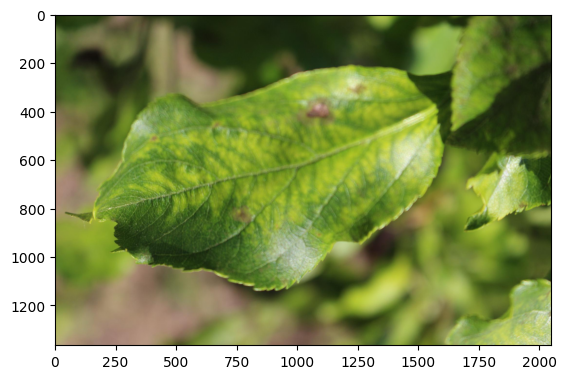

In [7]:
plt.imshow(scab_img)

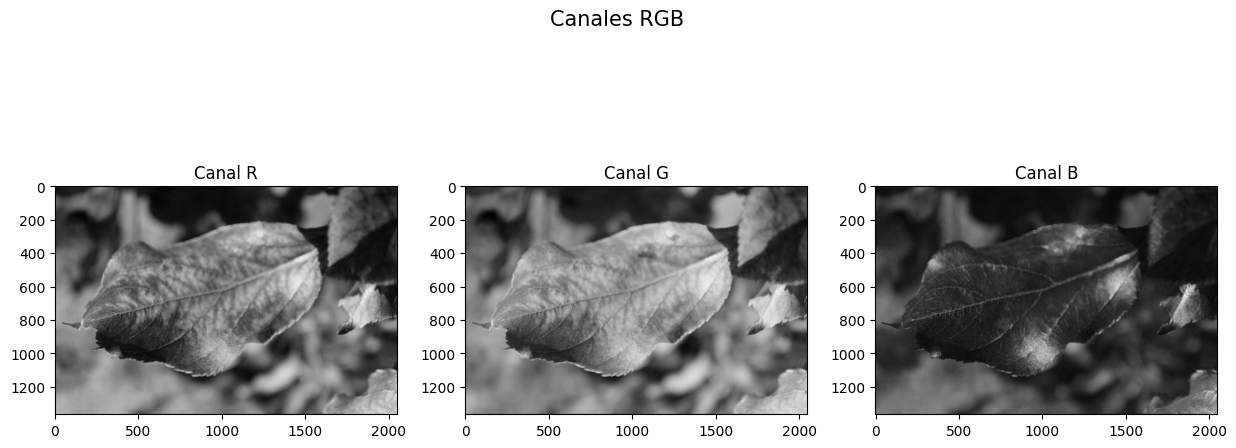

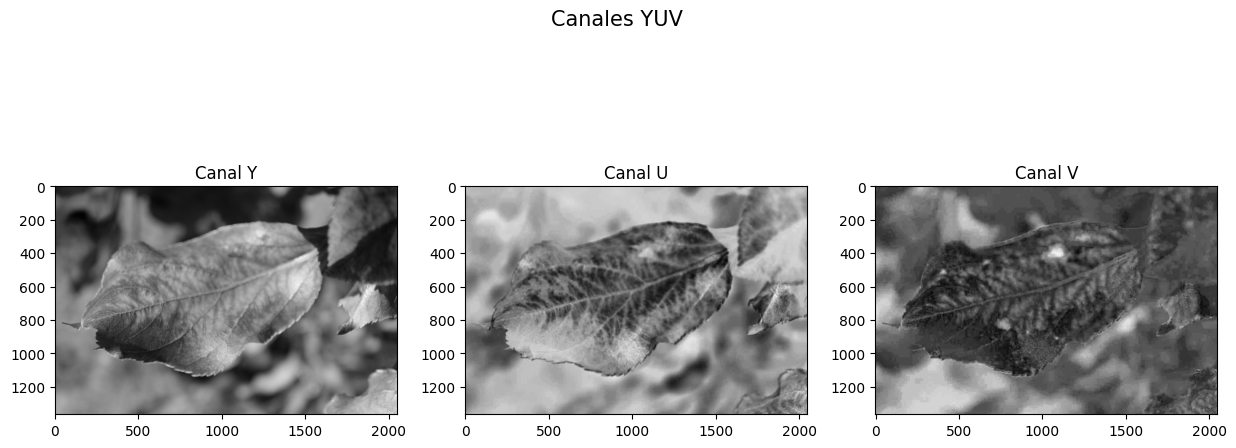

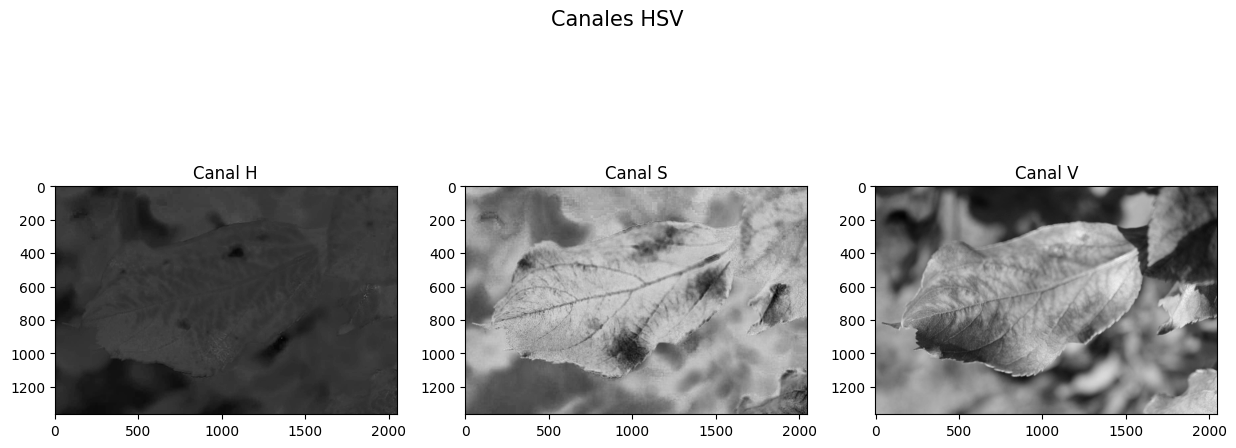

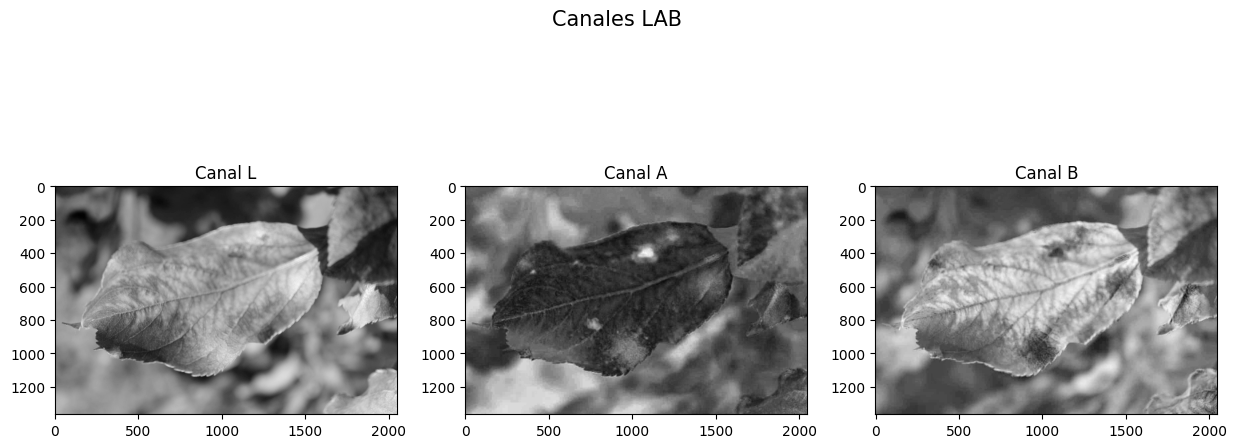

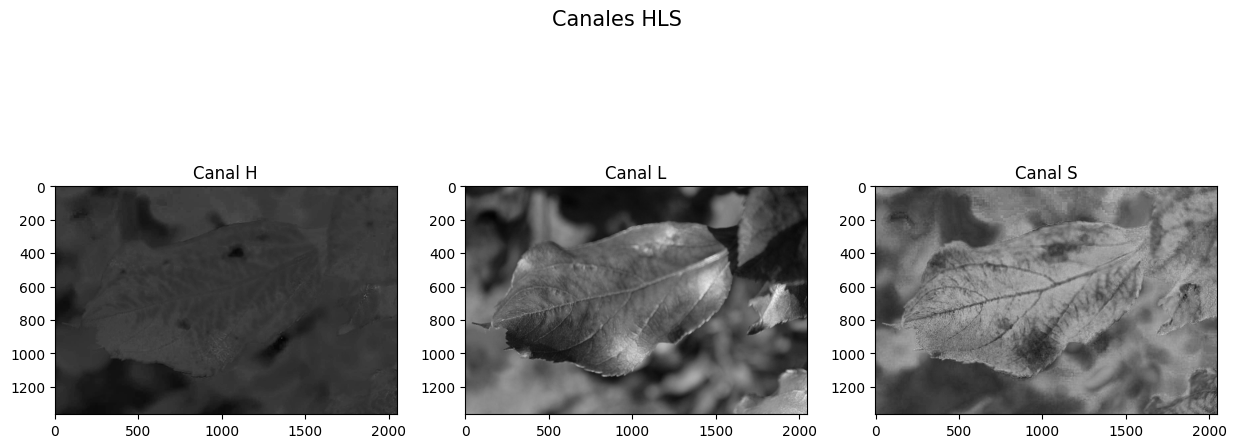

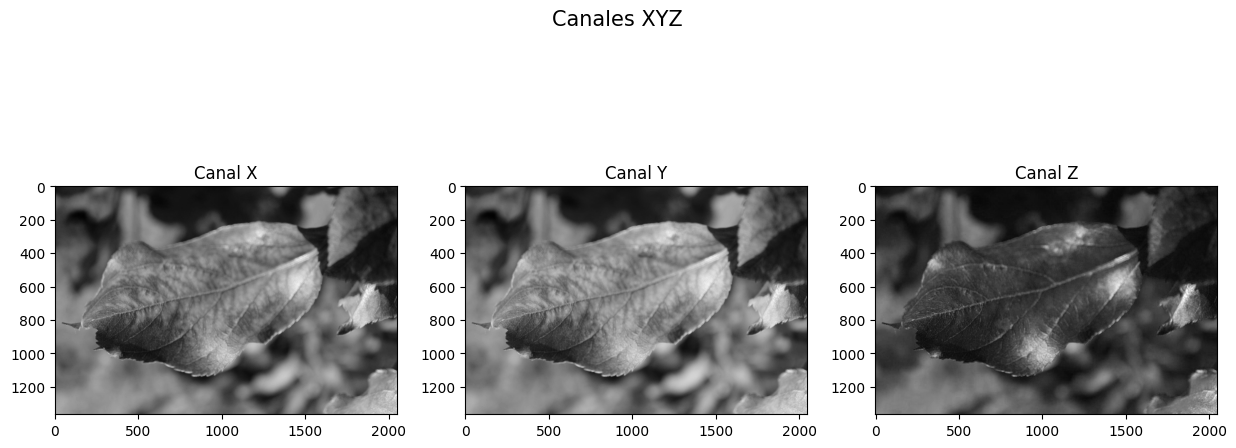

In [8]:
modes = ['RGB', 'YUV', 'HSV', 'LAB', 'HLS', 'XYZ']
for mode in modes :
    # Extracción de canales
    img = img_read("dataset\images\Train_0.jpg", mode=mode)

    c0 = img[:,:,0]
    c1 = img[:,:,1]
    c2 = img[:,:,2]

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
    fig.suptitle(f"Canales {mode}", fontsize=15)
    ax1.set_title(f'Canal {mode[0]}')
    ax1.imshow(c0, cmap='gray')
    ax2.set_title(f'Canal {mode[1]}')
    ax2.imshow(c1, cmap='gray')
    ax3.set_title(f'Canal {mode[2]}')
    ax3.imshow(c2, cmap='gray')

## rust_image

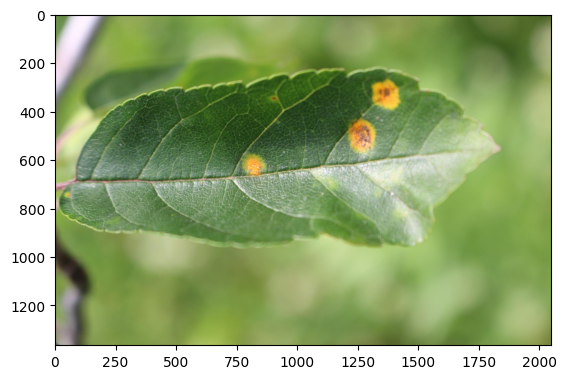

In [10]:
plt.imshow(rust_img)

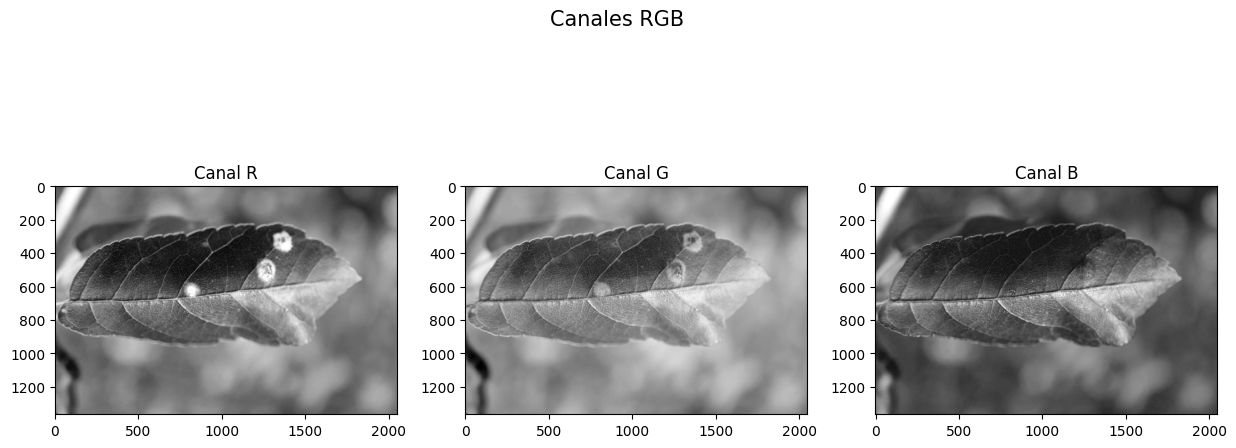

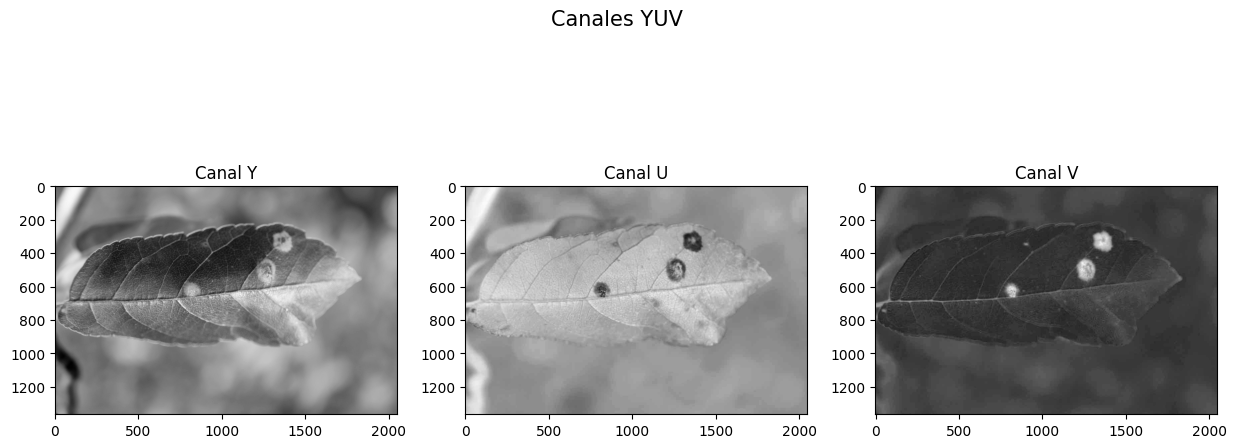

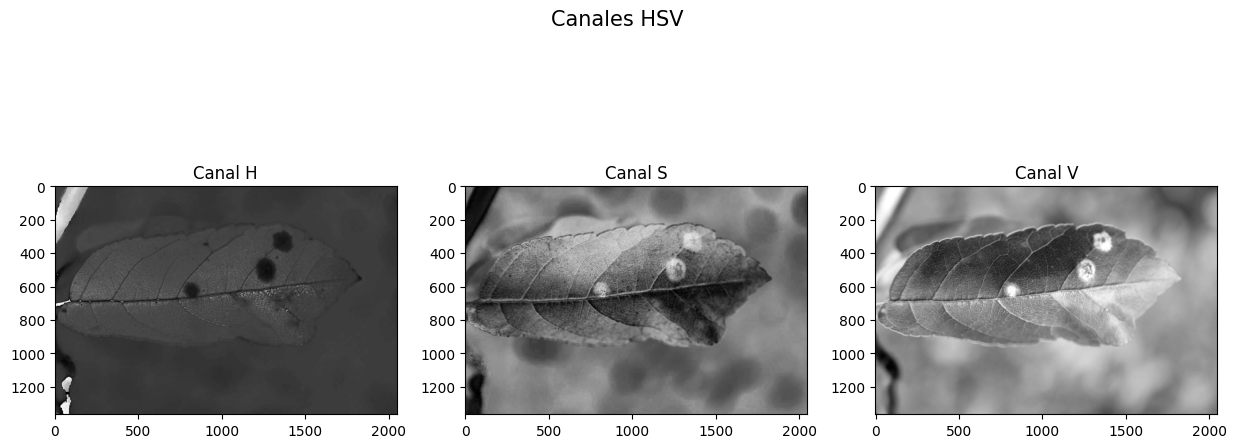

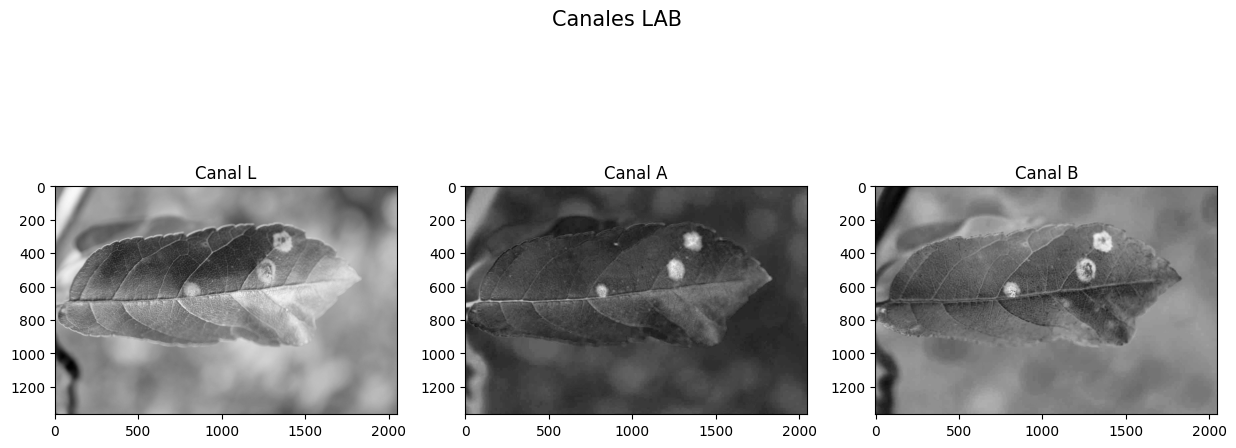

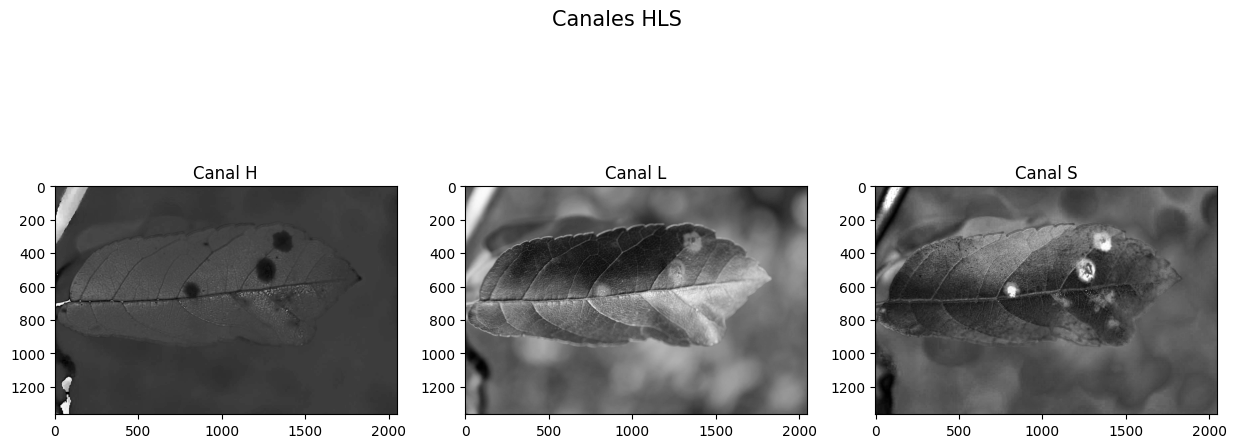

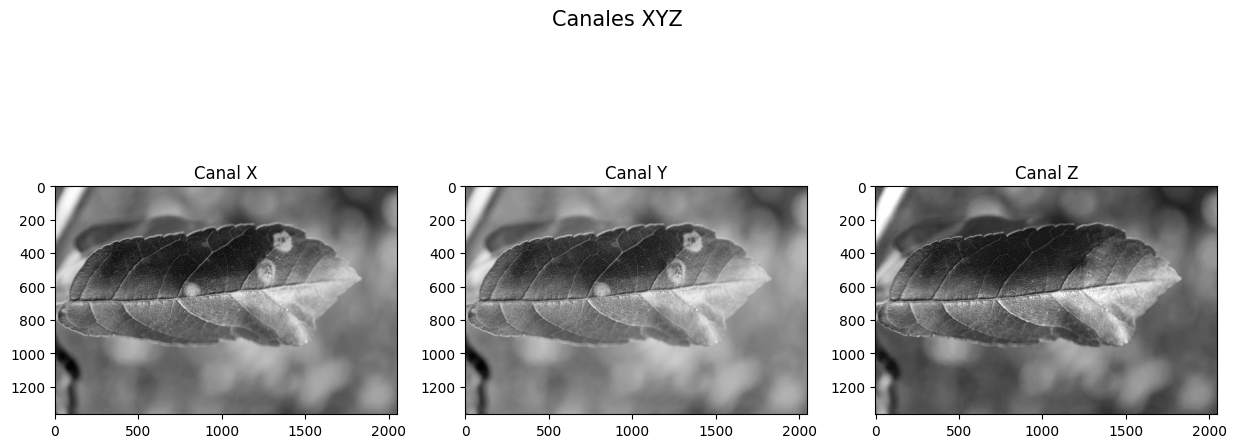

In [11]:
modes = ['RGB', 'YUV', 'HSV', 'LAB', 'HLS', 'XYZ']
for mode in modes :
    # Extracción de canales
    img = img_read("dataset\images\Train_3.jpg", mode=mode)

    c0 = img[:,:,0]
    c1 = img[:,:,1]
    c2 = img[:,:,2]

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 6))
    fig.suptitle(f"Canales {mode}", fontsize=15)
    ax1.set_title(f'Canal {mode[0]}')
    ax1.imshow(c0, cmap='gray')
    ax2.set_title(f'Canal {mode[1]}')
    ax2.imshow(c1, cmap='gray')
    ax3.set_title(f'Canal {mode[2]}')
    ax3.imshow(c2, cmap='gray')